In [60]:
# Assignment 5: Random Forest + Ensemble Learning (Bagging, Boosting, Stacking)
# Dataset: Iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

In [61]:
# -------------------------------
# 1) Load dataset
# -------------------------------
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names  # ['setosa', 'versicolor', 'virginica']

print("Dataset: Iris")
print("Samples:", X.shape[0], " Features:", X.shape[1])
print("Classes:", target_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Dataset: Iris
Samples: 150  Features: 4
Classes: ['setosa' 'versicolor' 'virginica']


In [62]:
# -------------------------------
# 2) Utility function
# -------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }

In [63]:
# -------------------------------
# 3) Base Classifiers
# -------------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
nb = GaussianNB()

In [64]:
# -------------------------------
# 4) Ensemble Methods
# -------------------------------

# Bagging with Decision Tree
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Boosting with AdaBoost
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Stacking (KNN + NB + DT + RF → Logistic Regression as meta-model)
stacking = StackingClassifier(
    estimators=[
        ("knn", Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])),
        ("nb", GaussianNB()),
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False
)


Decision Tree
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



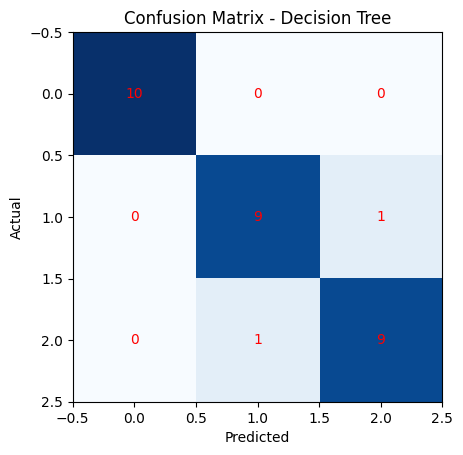

In [65]:
# -------------------------------
# 5) Train & Evaluate
# -------------------------------
results = []

# Individual classifiers
results.append(evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test))


Random Forest
----------------------------------------
Accuracy : 0.9
Precision: 0.9023569023569024
Recall   : 0.9
F1 Score : 0.8997493734335839

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



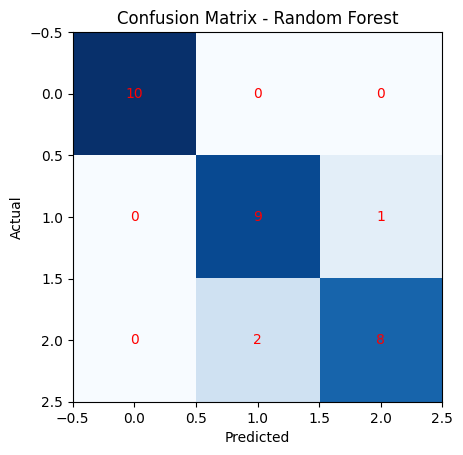

In [66]:
results.append(evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test))


KNN
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9444444444444445
Recall   : 0.9333333333333333
F1 Score : 0.9326599326599326

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



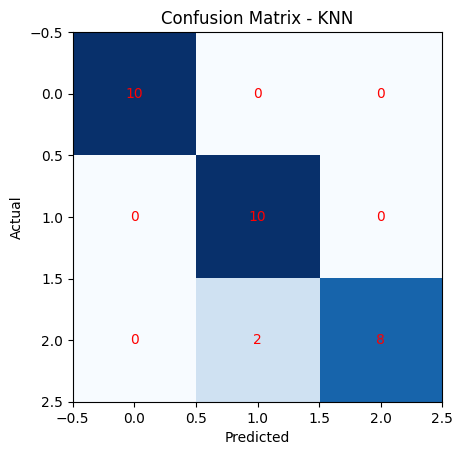

In [67]:
results.append(evaluate_model("KNN", knn, X_train, y_train, X_test, y_test))


Naive Bayes
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



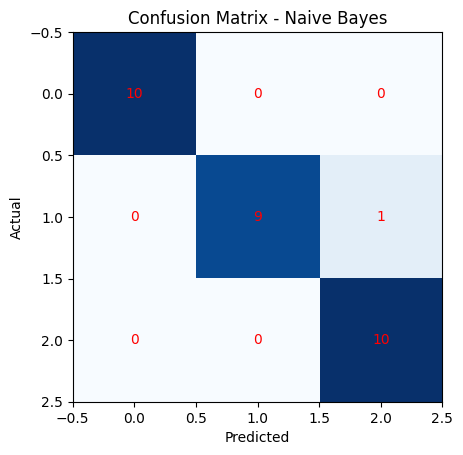

In [68]:
results.append(evaluate_model("Naive Bayes", nb, X_train, y_train, X_test, y_test))


Bagging (Decision Tree)
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



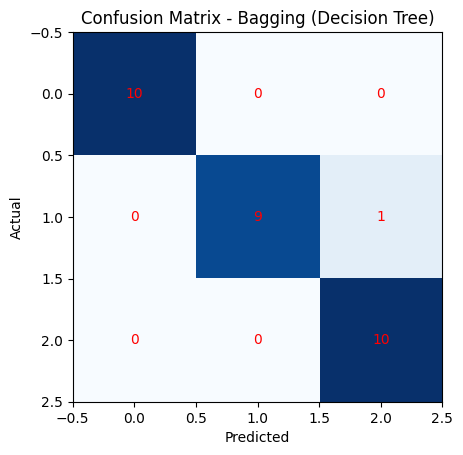

In [69]:
# Ensemble classifiers
results.append(evaluate_model("Bagging (Decision Tree)", bagging, X_train, y_train, X_test, y_test))


AdaBoost (Decision Stump)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



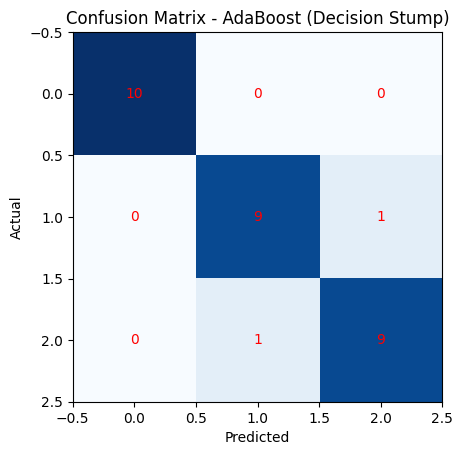

In [70]:
results.append(evaluate_model("AdaBoost (Decision Stump)", adaboost, X_train, y_train, X_test, y_test))


Stacking (KNN+NB+DT+RF)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



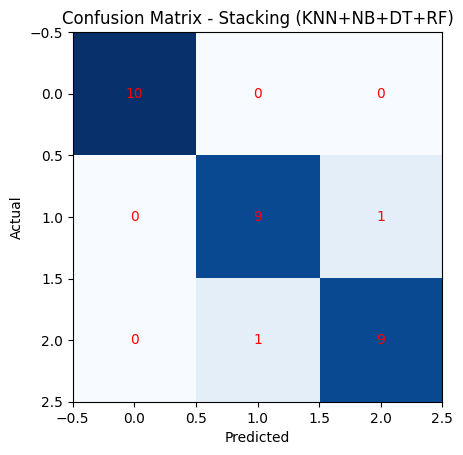

In [71]:
results.append(evaluate_model("Stacking (KNN+NB+DT+RF)", stacking, X_train, y_train, X_test, y_test))

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


Gradient Boosting
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



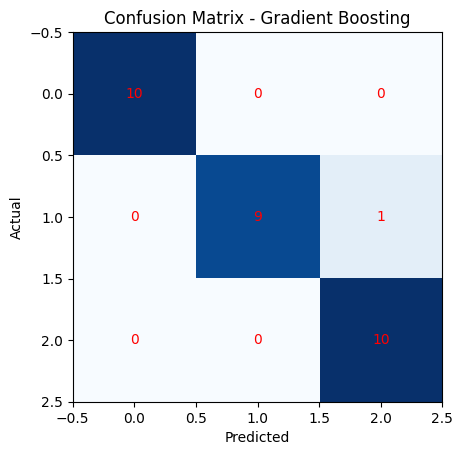

In [73]:
results.append(evaluate_model("Gradient Boosting", gradient_boosting, X_train, y_train, X_test, y_test))

In [74]:
results_df = pd.DataFrame(results)
print("\n\nFinal Comparison Table:\n")
print(results_df)



Final Comparison Table:

                       Model  Accuracy  Precision    Recall        F1
0              Decision Tree  0.933333   0.933333  0.933333  0.933333
1              Random Forest  0.900000   0.902357  0.900000  0.899749
2                        KNN  0.933333   0.944444  0.933333  0.932660
3                Naive Bayes  0.966667   0.969697  0.966667  0.966583
4    Bagging (Decision Tree)  0.966667   0.969697  0.966667  0.966583
5  AdaBoost (Decision Stump)  0.933333   0.933333  0.933333  0.933333
6    Stacking (KNN+NB+DT+RF)  0.933333   0.933333  0.933333  0.933333
7          Gradient Boosting  0.966667   0.969697  0.966667  0.966583
